# **FB-31 Vasalatii Anton, Task 6** 
___
## ***Dataset*** 
**Source**: Chen, S. (2015). Beijing PM2.5 [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5JS49.

**General**: This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.  

**Subject Area**: Climate and Environment  

**Associated Tasks**:  Regression

**Dataset Characteristics**: Multivariate, Time-Series  

**Instances**: 43824  

**Columns count**: 13 

**Missing values**: Yes  

**Additional info**: The data's time period is between Jan 1st, 2010 to Dec 31st, 2014. Missing data are denoted as "NA".
___
### **Variables info**
**No**: row number

**year**: year of data in this row

**month**: month of data in this row

**day**: day of data in this row

**hour**: hour of data in this row

**pm2.5**: PM2.5 concentration

**DEWP**: Dew Point

**TEMP**: Temperature

**PRES**: Pressure

**cbwd**: Combined wind direction

**Iws**: Cumulated wind speed  

**Is**: Cumulated hours of snow

**Ir**: Cumulated hours of rain  
___

**Setup imports**

In [152]:
from colorama import Fore, Style
import pandas as pd
import numpy as np
import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.interpolate import griddata
from scipy import stats
from scipy.stats import pearsonr

**Additional functions that use python-tabulate and colorama to make output beautiful** 

In [153]:
def print_df(frame):
    print(Fore.LIGHTCYAN_EX + tabulate.tabulate(frame, headers='keys', tablefmt="heavy_grid", showindex=False) + Style.RESET_ALL)

In [154]:
def print_green_cyan_colored_pair(tag, value, indentation=''):
    print(indentation + Fore.LIGHTGREEN_EX + tag + " " + Fore.CYAN + str(value) + Style.RESET_ALL)

**Parsing data with Pandas**  
Here we read cleaned data from task1

In [155]:
headers = ['No', 'Year', 'Month', 'Day', 'Hour', 'PM2.5', 'DEWP', 'TEMP', 'PRES', 'CBWD', 'IWS','IS','IR']
df = pd.read_csv("../Lab1/beijing_pm_2_5_cleared.csv",delimiter=",",index_col=False, header=1, na_values=['NA'], names=headers)
print_df(df.head())

┏━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┓
┃   No ┃   Year ┃   Month ┃   Day ┃   Hour ┃   PM2.5 ┃   DEWP ┃   TEMP ┃   PRES ┃ CBWD   ┃   IWS ┃   IS ┃   IR ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━╋━━━━━━┫
┃   26 ┃   2010 ┃       1 ┃     2 ┃      1 ┃     148 ┃    -15 ┃     -4 ┃   1020 ┃ SE     ┃  2.68 ┃    0 ┃    0 ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━╋━━━━━━┫
┃   27 ┃   2010 ┃       1 ┃     2 ┃      2 ┃     159 ┃    -11 ┃     -5 ┃   1021 ┃ SE     ┃  3.57 ┃    0 ┃    0 ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━╋━━━━━━┫
┃   28 ┃   2010 ┃       1 ┃     2 ┃      3 ┃     181 ┃     -7 ┃     -5 ┃   1022 ┃ SE     ┃  5.36 ┃    1 ┃    0 ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━

### **Plotting**

**Drawing boxplot and violing plot**  
We use **violinplot** and **boxplot** from seaborn to draw **PM2.5** violinplot and boxplot with categorization by **CBWD** -  
https://seaborn.pydata.org/generated/seaborn.violinplot.html  
https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

sns.violinplot(y=df['PM2.5'], x=df['CBWD'], ax=axs[0])
axs[0].set_title('PM2.5 Violin plot', fontweight="bold")
axs[0].set_ylabel('PM2.5',fontweight="bold")
axs[0].set_xlabel('CBWD',fontweight="bold")
axs[0].grid(True, linestyle="--", alpha=0.7)

sns.boxplot(
    y=df['PM2.5'], x=df['CBWD'],ax=axs[1],fliersize=5,linewidth=1.5,boxprops=dict(alpha=0.7), 
)
axs[1].set_title('PM2.5 Box plot', fontweight="bold")
axs[1].set_ylabel('PM2.5',fontweight="bold")
axs[1].grid(True, linestyle="--", alpha=0.7)

plt.show()


**Drawing histogram and density plot**  
Here we use https://seaborn.pydata.org/generated/seaborn.histplot.html

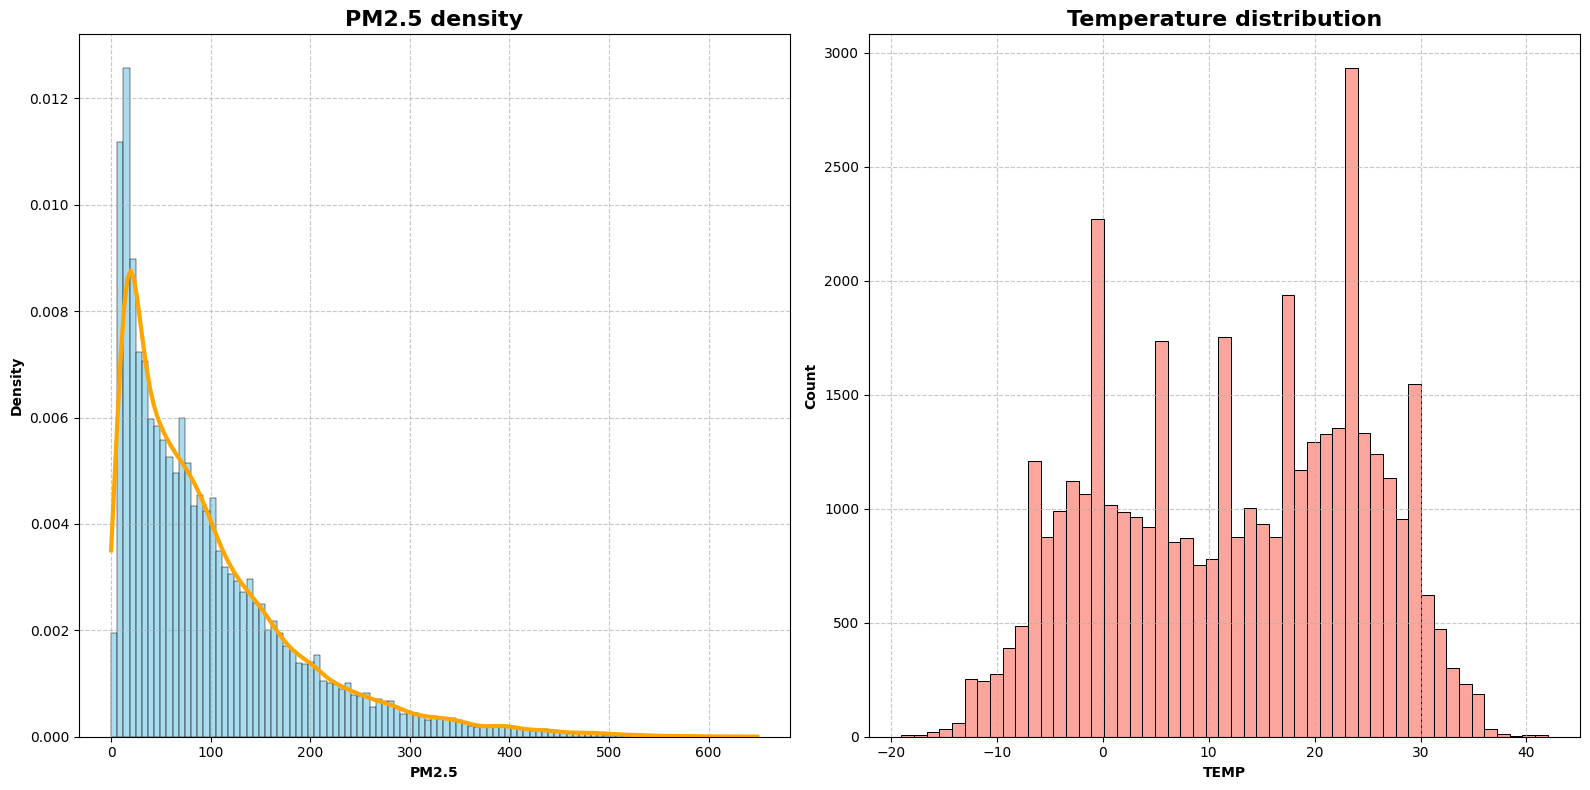

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

ax = sns.histplot(data=df, x='PM2.5', ax=axs[0], stat='density', kde=True, color='skyblue', line_kws={ 'linewidth': 3}, edgecolor='black', alpha=0.7)
ax.lines[0].set_color('orange')
axs[0].set_title('PM2.5 density', fontsize=16,fontweight="bold")
axs[0].set_xlabel('PM2.5',fontweight="bold")
axs[0].set_ylabel('Density',fontweight="bold")
axs[0].grid(True, linestyle="--", alpha=0.7)


sns.histplot(data=df, x='TEMP', ax=axs[1], color='salmon', edgecolor='black', alpha=0.7)
axs[1].set_title('Temperature distribution', fontsize=16,fontweight="bold")
axs[1].set_xlabel('TEMP',fontweight="bold")
axs[1].set_ylabel('Count',fontweight="bold")
axs[1].grid(True, linestyle="--", alpha=0.7)


plt.tight_layout()
plt.show()


**Contour plot**  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html - plot filled contours.  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html - plot contour lines.  

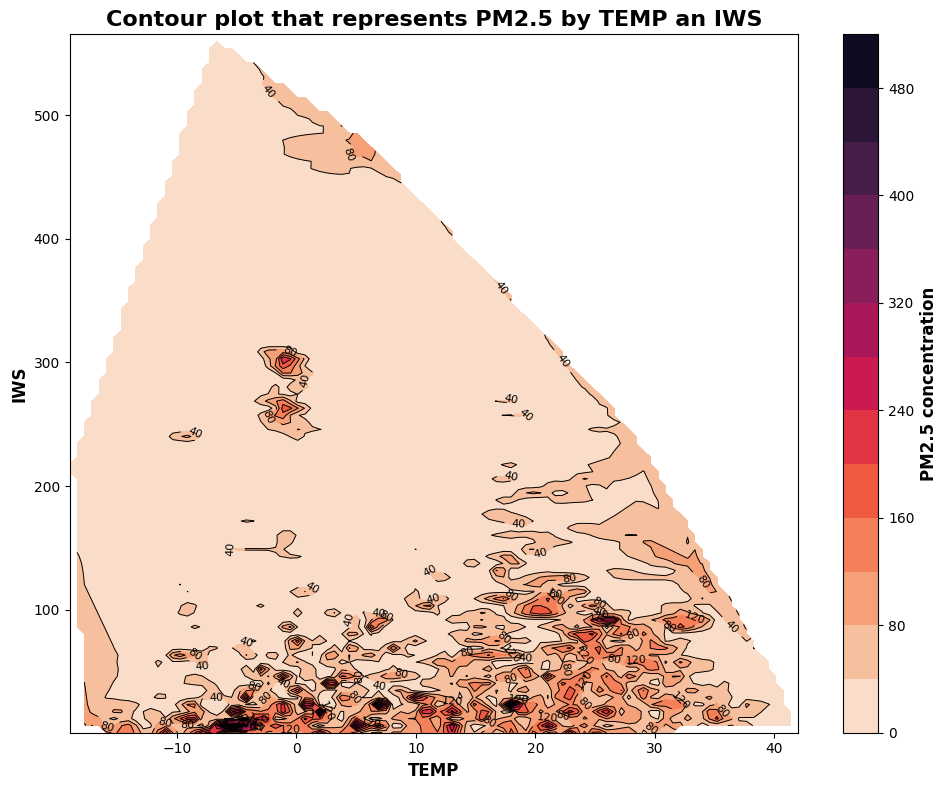

In [ ]:
x = df['TEMP']
y = df['IWS']
z = df['PM2.5']

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(xi, yi)

Z = griddata((x, y), z, (X, Y), method='linear')

plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=14, cmap='rocket_r')
cbar = plt.colorbar(contour)
cbar.set_label('PM2.5 concentration', fontsize=12, fontweight='bold')

lines = plt.contour(X, Y, Z, levels=14, colors='black', linewidths=0.7)
plt.clabel(lines, inline=True, fontsize=8, fmt="%.0f")

plt.title('Contour plot that represents PM2.5 by TEMP an IWS', fontsize=16, fontweight='bold')
plt.xlabel('TEMP', fontsize=12, fontweight='bold')
plt.ylabel('IWS', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


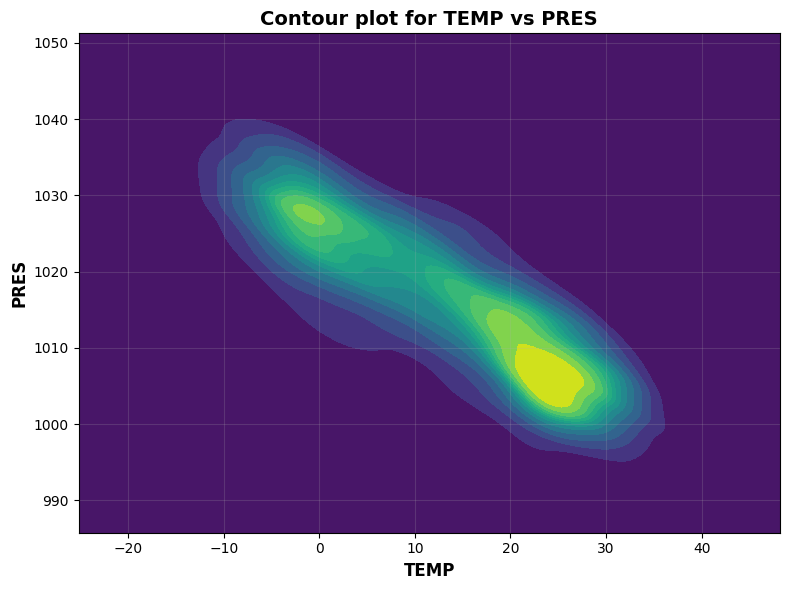

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['TEMP'], y=df['PRES'], fill=True, cmap="viridis", thresh=0,levels=14)

plt.title("Contour plot for TEMP vs PRES", fontsize=14, fontweight='bold')
plt.xlabel("TEMP", fontsize=12, fontweight='bold')
plt.ylabel("PRES", fontsize=12, fontweight='bold')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

### **Distributions of values**

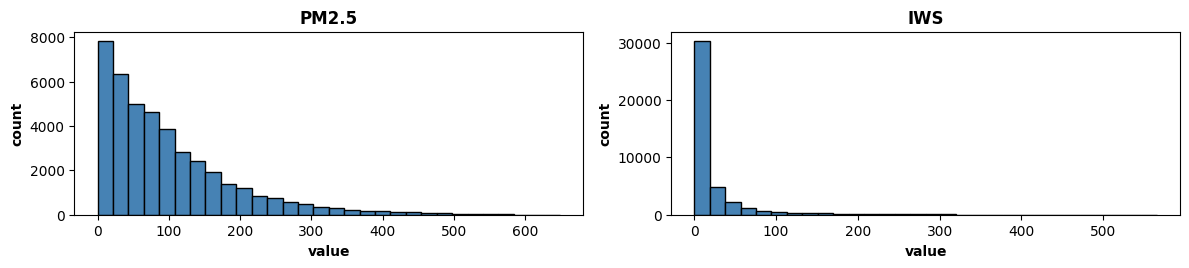

In [ ]:
cols = ['PM2.5', 'IWS']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=30, color='steelblue', edgecolor='black')
    axes[i].set_title(col, fontweight='bold')
    axes[i].set_xlabel("value", fontweight='bold')
    axes[i].set_ylabel("count",fontweight='bold')

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Comparing the distributions of the attributes of our dataset with the appearance of some known distributions**  
**we can say that *PM2.5* and *IWS* have distributions similar to *exponential.***

**The appearance of some known distributions**  
  
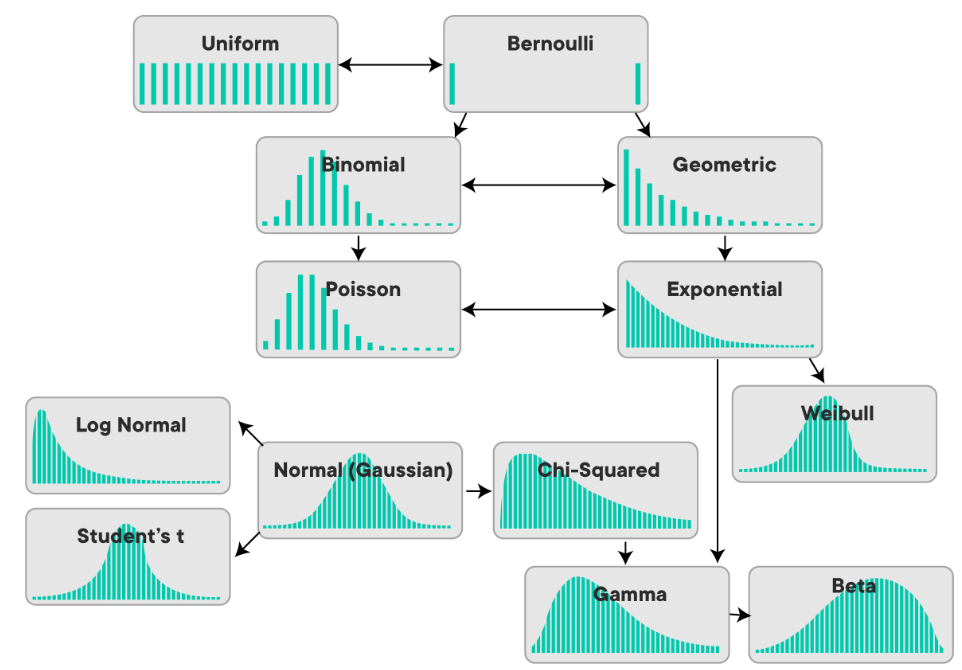

### **Mode and SE**

**To calculate SE both np.std divided by sqrt of set len and scipy.stats.sem are used.**  
https://numpy.org/devdocs/reference/generated/numpy.std.html  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html  

In [ ]:
def standard_error(data):
    return np.std(data) / np.sqrt(len(data))

In [ ]:
print_green_cyan_colored_pair("PM2.5 SE with scipy:", stats.sem(df['PM2.5'],ddof=0))
print_green_cyan_colored_pair("PM2.5 SE with np:", standard_error(df['PM2.5']))

PM2.5 SE with scipy: 0.4433083220462124
PM2.5 SE with np: 0.4433083220462124


**Here we also calculate mode:**

In [ ]:
print_green_cyan_colored_pair("PM2.5 mode:", df['PM2.5'].mode().tolist())

PM2.5 mode: [16.0]


### **Correlation**

Pearson correlation coefficient between **pressure** and **temperature** that was calculated using **pearsonr** function from scipy -  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [ ]:
correlation_coefficient, _ = pearsonr(df['PRES'],df['TEMP'])
print_green_cyan_colored_pair("Pearson correlation coefficient between pressure and temperature", correlation_coefficient)

Pearson correlation coefficient between pressure and temperature -0.8269680623000999


We use **pandas.DataFrame.corr** (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)  
to compute pairwise correlation of columns and then vizualize it with **seaborn heatmap**

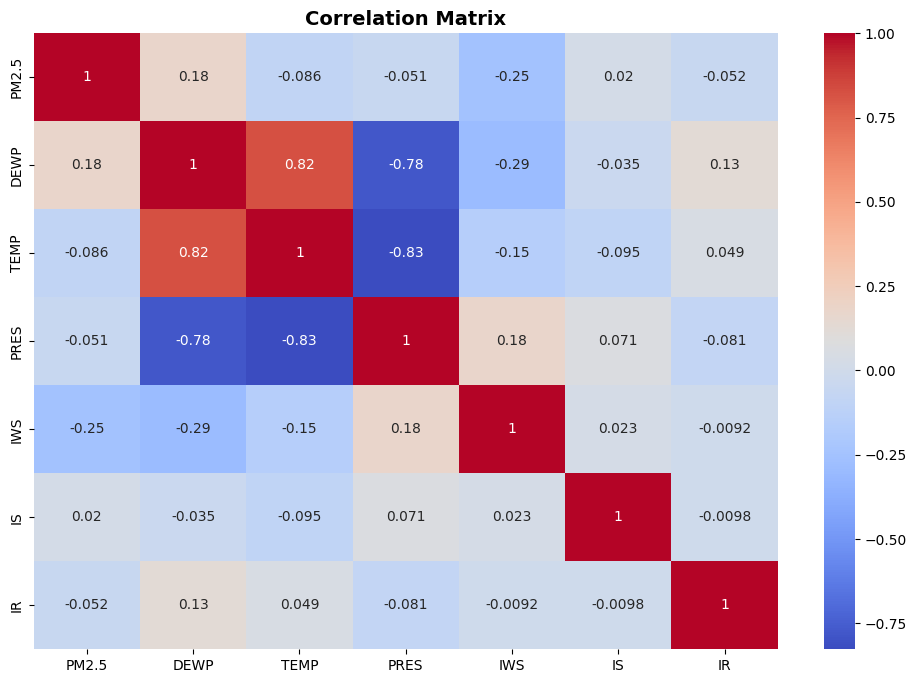

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['PM2.5', 'DEWP', 'TEMP', 'PRES', 'IWS','IS','IR']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontweight="bold", fontsize=14)
plt.show()

### **PCA**

**Scaling components before using PCA.**  
Standart scaler from sklearn - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
feautres_for_pca = df[['PM2.5', 'DEWP', 'TEMP', 'PRES', 'IWS']]
feautres_for_pca_scaled = StandardScaler().fit_transform(feautres_for_pca)

Using PCA from sklearn.decomposition to make 2 components - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html  
Useful article - https://www.datacamp.com/tutorial/principal-component-analysis-in-python

In [ ]:
pca = PCA(n_components=2)
df_pc = pca.fit_transform(feautres_for_pca_scaled)

In [ ]:
loadings = pd.DataFrame(pca.components_, columns=feautres_for_pca.columns)
print_df(loadings)

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┓
┃     PM2.5 ┃      DEWP ┃      TEMP ┃      PRES ┃       IWS ┃
┣━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ 0.0795622 ┃ 0.569375  ┃  0.559602 ┃ -0.556023 ┃ -0.217176 ┃
┣━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ 0.748838  ┃ 0.0327345 ┃ -0.24322  ┃  0.130855 ┃ -0.601574 ┃
┗━━━━━━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━┛


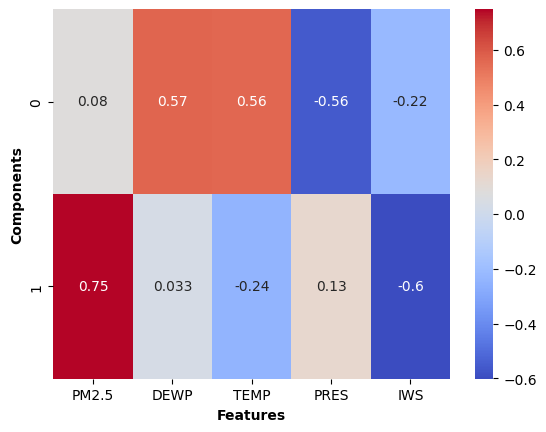

In [ ]:
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.xlabel("Features", fontweight="bold")
plt.ylabel("Components", fontweight="bold")
plt.show()

In [ ]:
print_green_cyan_colored_pair('Explained variability per principal component:',pca.explained_variance_ratio_)
print_green_cyan_colored_pair('Total explained variability', sum(pca.explained_variance_ratio_))

Explained variability per principal component: [0.54118022 0.24557318]
Total explained variability 0.7867533964808737


**Considering the weights of the features in the components, we can say that the first one is about “temperature and humidity regime”,**  
**and the second one is about “PM2.5 concentrations vary depending on wind speed”.**  
**Also considering that 78.7% of the variance of these 5 attributes is explained by these 2 components, we can use them instead of these attributes.**  
**If we need to achieve higher accuracy, it would be better to create 3 components. This will allow us to achieve 93.3%**  
**(PM2.5 will have the main weight in the 2nd component and IWS in the 3rd)**  
**(appropriate calculataions for 3 components also were done (*pca = PCA(n_components=2))* - n_components was changed to 3)**  

### **Bootstrapping**

**Useful articles that were used during doing this part:**  
https://medium.com/@whystudying/resampling-with-python-bootstrap-50f21866d7c9  
https://tinztwinshub.com/data-science/exploring-the-fundamentals-of-the-statistical-bootstrap-approach/

In [ ]:
def create_bootstrap_samples(data : pd.Series, sample_size:int, n_samples):
    sample_means = []
    
    for i in range(n_samples):
        df_bootstrap_sample = data.sample(n = sample_size, replace = True)
        sample_mean = df_bootstrap_sample.mean()
        sample_means.append(sample_mean)
    
    return pd.Series(sample_means)

In [ ]:
pm_samples_means = create_bootstrap_samples(df['PM2.5'],1000,1000)

ci_lower = pm_samples_means.quantile(q = 0.025)
ci_higher = pm_samples_means.quantile(q = 0.975)

In [ ]:
print_green_cyan_colored_pair("Confidence Interval lower bound:", ci_lower)
print_green_cyan_colored_pair("Confidence Interval higher bound:", ci_higher)

Confidence Interval lower bound: 92.97095
Confidence Interval higher bound: 104.178225


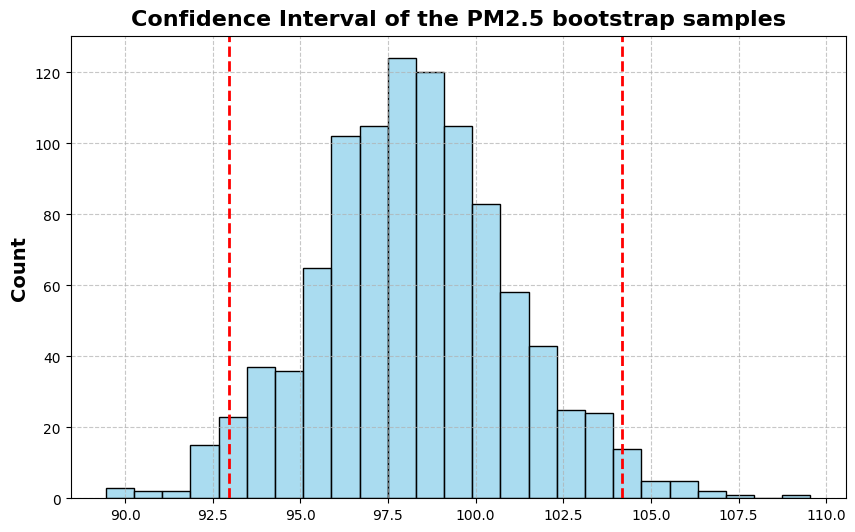

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(pm_samples_means, bins=25, color='skyblue', edgecolor='black', alpha=0.7)

plt.axvline(ci_lower, color='red', linestyle='--', linewidth=2)
plt.axvline(ci_higher, color='red', linestyle='--', linewidth=2)

plt.title('Confidence Interval of the PM2.5 bootstrap samples', fontsize=16, pad=8, fontweight="bold")
plt.ylabel('Count', fontsize=14, fontweight="bold")

plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### **Summary**
**In the task, we practically used our knowledge of different types of graphs, such as histograms, kde plots, heatmaps, boxplots, violinplots, etc., to visualize different attributes of our dataset, explore their distributions and relationships.**  
**In particular, by comparing the distributions of the attributes of our dataset with the appearance of some known distributions**  
**we determined that *PM2.5* and *IWS* have distributions similar to *exponential.***
  
**Also SE and mode of PM2.5 were calculated**:  
**PM2.5 SE: *0.4433083220462124***  
**PM2.5 mode: *16***

**Then we bult pairwise correlation matrix with pandas.DataFrame.corr (*https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html*)**

**We formed 2 components using PCA from attributes set - *'PM2.5', 'DEWP', 'TEMP', 'PRES', 'IWS'*.**  
**First one concerns the “temperature and humidity regime”, and the second one - “PM2.5 concentrations vary with wind speed”.**  
**Explained variability per principal component: *[0.54118022 0.24557318]***  
**Total explained variability *0.7867533964808737***  
**Considering that *78.7%* of the variance of these 5 attributes is explained by these 2 components, we can use them instead of these attributes.**  
**If we need to achieve higher accuracy, it would be better to create 3 components. This will allow us to achieve *93.3%***  
**(*PM2.5* will have the main weight in the 2nd component and *IWS* in the 3rd)**  
**(appropriate calculataions for 3 components also were done)**  

**Finally, after reading a few helpful articles, we created 1000 bootstrap samples of PM2.5 with 1000 elements per sample**  
**As a result, we obtained the following 95% confidence interval limits:**  
**Lower confidence interval limit: *92.70317499999999***  
**Upper confidence interval limit: *103.7652000000000***   
***https://medium.com/@whystudying/resampling-with-python-bootstrap-50f21866d7c9***  
***https://tinztwinshub.com/data-science/exploring-the-fundamentals-of-the-statistical-bootstrap-approach/***